# HHA550_Stroke Prediction Dataset

## Healtcare-dataset-stroke-data

#### (Check Modules folders for csv and ipynb for each class)

# DATA
## Stroke Prediction Dataset


# .CSV Data
### Healtcare-dataset-stroke-data.csv

# IMPORTING Everthing

In [1]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [2]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [3]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            ConfusionMatrixDisplay, classification_report, RocCurveDisplay, f1_score
from sklearn.linear_model import LinearRegression
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [4]:
dm = pd.read_csv('/Users/lozo/Developer/AHI_Github/HHA550_Analysis/data/cleaned_diabetic_data1.csv')

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [5]:
dm.head()

Unnamed: 0  encounter_id  patient_nbr  race  gender  age  weight   
0           0       2278392      8222157     3       0    1     999  \
1           1        149190     55629189     3       0    2     999   
2           2         64410     86047875     1       0    3     999   
3           3        500364     82442376     3       1    4     999   
4           4         16680     42519267     3       1    5     999   

   admission_type_id  discharge_disposition_id  admission_source_id  ...   
0                  6                        25                    1  ...  \
1                  1                         1                    7  ...   
2                  1                         1                    7  ...   
3                  1                         1                    7  ...   
4                  1                         1                    7  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin   
0            0        0                    0                    0  \
1            0        1                    0                    0   
2            0        0                    0                    0   
3            0        1                    0                    0   
4            0        1                    0                    0   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone   
0                         0                        0                       0  \
1                         0                        0                       0   
2                         0                        0                       0   
3                         0                        0                       0   
4                         0                        0                       0   

   change  diabetesMed  readmitted  
0       0            0           0  
1       1            1           1  
2       0            1           0  
3       1            1           0  
4       1            1           0  

[5 rows x 46 columns]

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [6]:
y = dm['readmitted']
print(f'Percentage of patient had been readmitted: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had been readmitted: % 34.93 --> (35545 patient)
Percentage of patient did not have a stroke: % 65.07 --> (66221 patient)


### So what does that all mean?
We have imbalanced data

* Almost 95% of the instances of our target variable are `No stroke`
* 4861 patient do not have a stroke
* 5% of the instances of our target variable are `Stroke`
* 249 patient have a stroke.

### Visualize stroke

In [7]:
fig = px.histogram(dm, x="readmitted", title='Readmitted < 30 Days', width=400, height=400)
fig.show()

* The stroke dataset is an example of a so-called imbalanced dataset.
* There are 19 times more people who didn’t have stroke in our data than who had (the non-stroke class dominates the stroke class)
* We can clearly see that: the stroke rate in our data is 0.048
* Which is a strong indicator of class imbalance

In [8]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Unnamed: 0                101766 non-null  int64
 1   encounter_id              101766 non-null  int64
 2   patient_nbr               101766 non-null  int64
 3   race                      101766 non-null  int64
 4   gender                    101766 non-null  int64
 5   age                       101766 non-null  int64
 6   weight                    101766 non-null  int64
 7   admission_type_id         101766 non-null  int64
 8   discharge_disposition_id  101766 non-null  int64
 9   admission_source_id       101766 non-null  int64
 10  time_in_hospital          101766 non-null  int64
 11  num_lab_procedures        101766 non-null  int64
 12  num_procedures            101766 non-null  int64
 13  num_medications           101766 non-null  int64
 14  number_outpatient   

### Check for Missing Data / Missing Values

In [9]:
def missing (stroke):
    missing_number = stroke.isnull().sum().sort_values(ascending=False)
    missing_percent = (stroke.isnull().sum()/stroke.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(dm)

Missing_Number  Missing_Percent
Unnamed: 0                             0              0.0
tolazamide                             0              0.0
acetohexamide                          0              0.0
glipizide                              0              0.0
glyburide                              0              0.0
tolbutamide                            0              0.0
pioglitazone                           0              0.0
rosiglitazone                          0              0.0
acarbose                               0              0.0
miglitol                               0              0.0
troglitazone                           0              0.0
examide                                0              0.0
encounter_id                           0              0.0
citoglipton                            0              0.0
insulin                                0              0.0
glyburide-metformin                    0              0.0
glipizide-metformin                    0              0.0
glimepiride-pioglitazone               0              0.0
metformin-rosiglitazone                0              0.0
metformin-pioglitazone                 0              0.0
change                                 0              0.0
diabetesMed                            0              0.0
glimepiride                            0              0.0
chlorpropamide                         0              0.0
nateglinide                            0              0.0
repaglinide                            0              0.0
patient_nbr                            0              0.0
race                                   0              0.0
gender                                 0              0.0
age                                    0              0.0
weight                                 0              0.0
admission_type_id                      0              0.0
discharge_disposition_id               0              0.0
admission_source_id                    0              0.0
time_in_hospital                       0              0.0
num_lab_procedures                     0              0.0
num_procedures                         0              0.0
num_medications                        0              0.0
number_outpatient                      0              0.0
number_emergency                       0              0.0
number_inpatient                       0              0.0
number_diagnoses                       0              0.0
max_glu_serum                          0              0.0
A1Cresult                              0              0.0
metformin                              0              0.0
readmitted                             0              0.0

<Axes: >

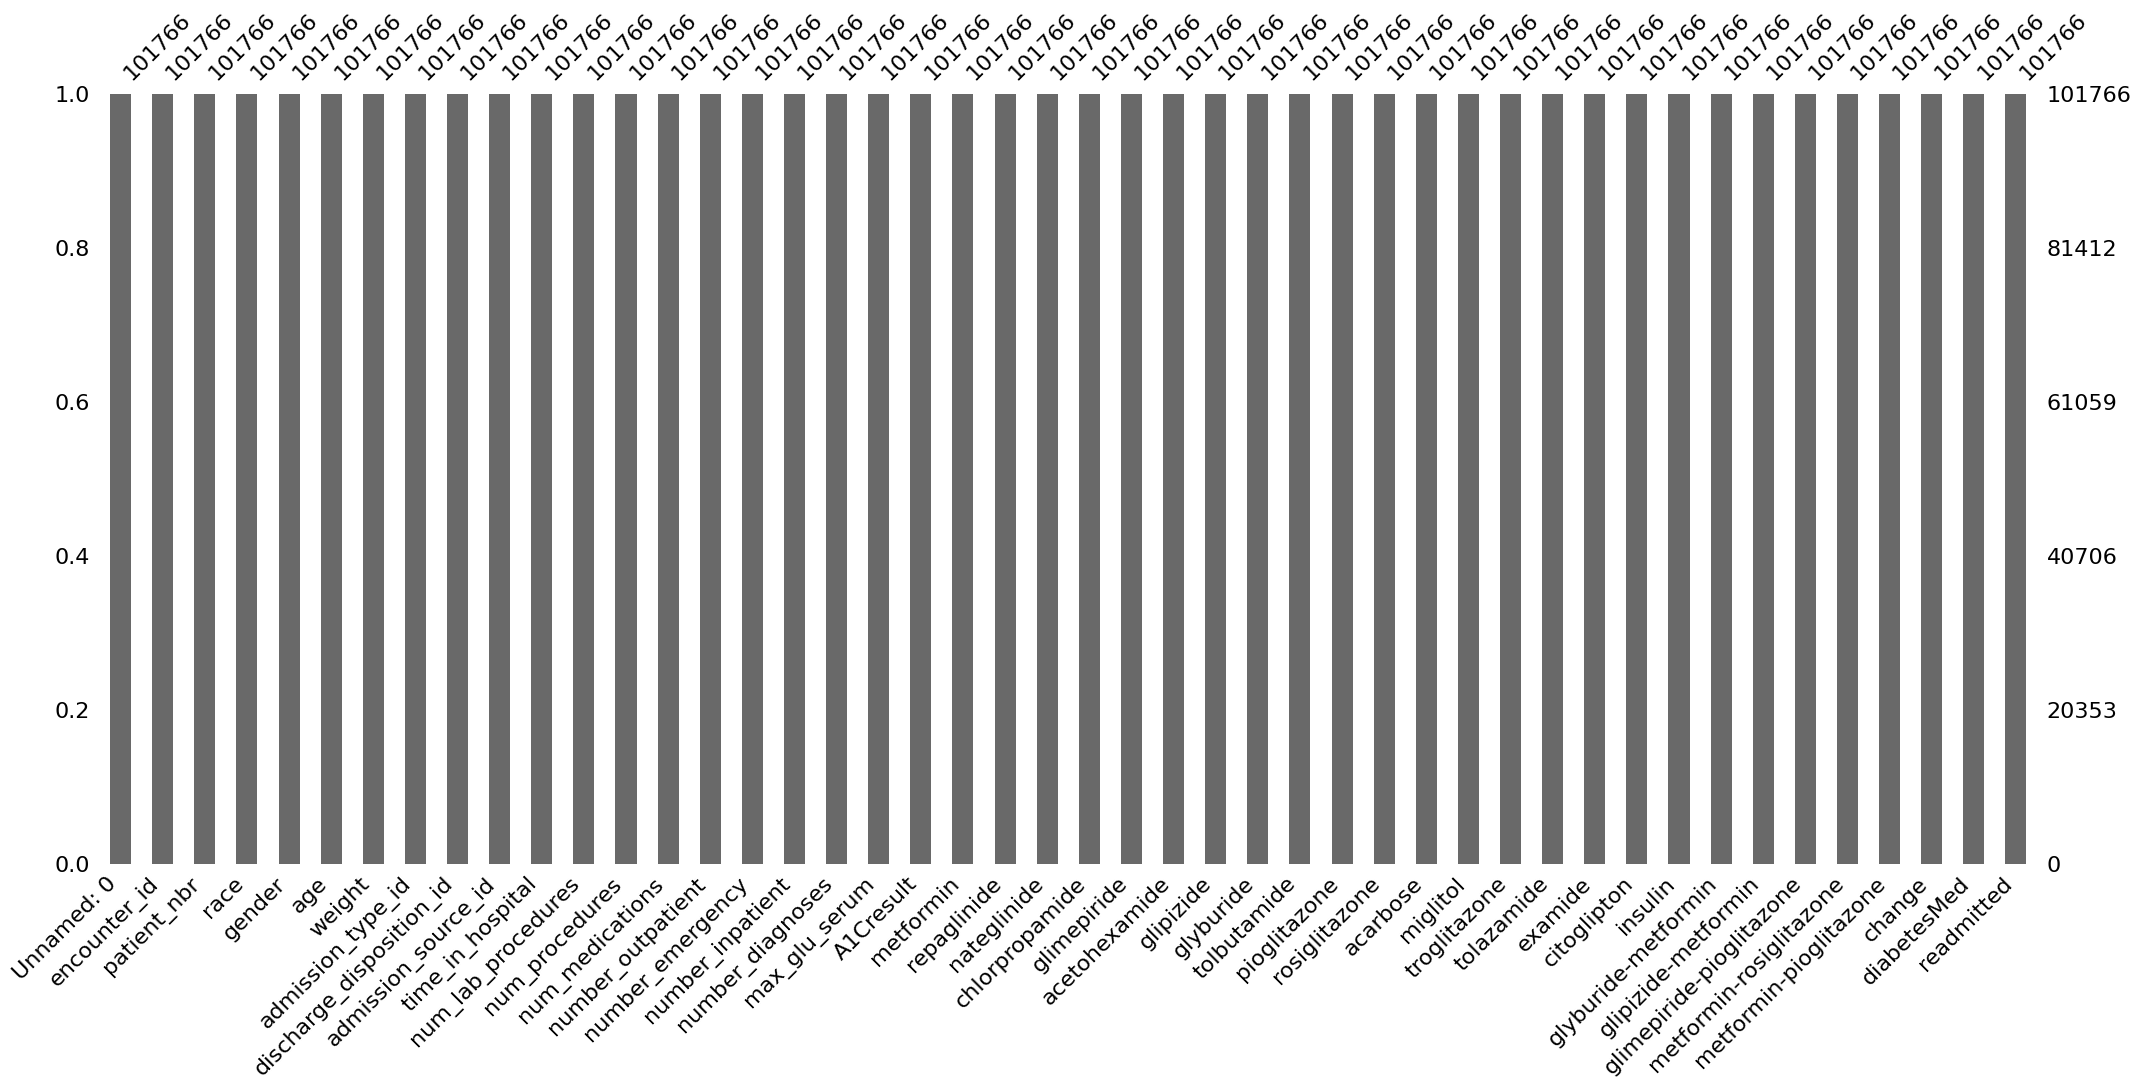

In [10]:
# Visualizing the missing data to get more idea
msno.bar(dm)

<Axes: >

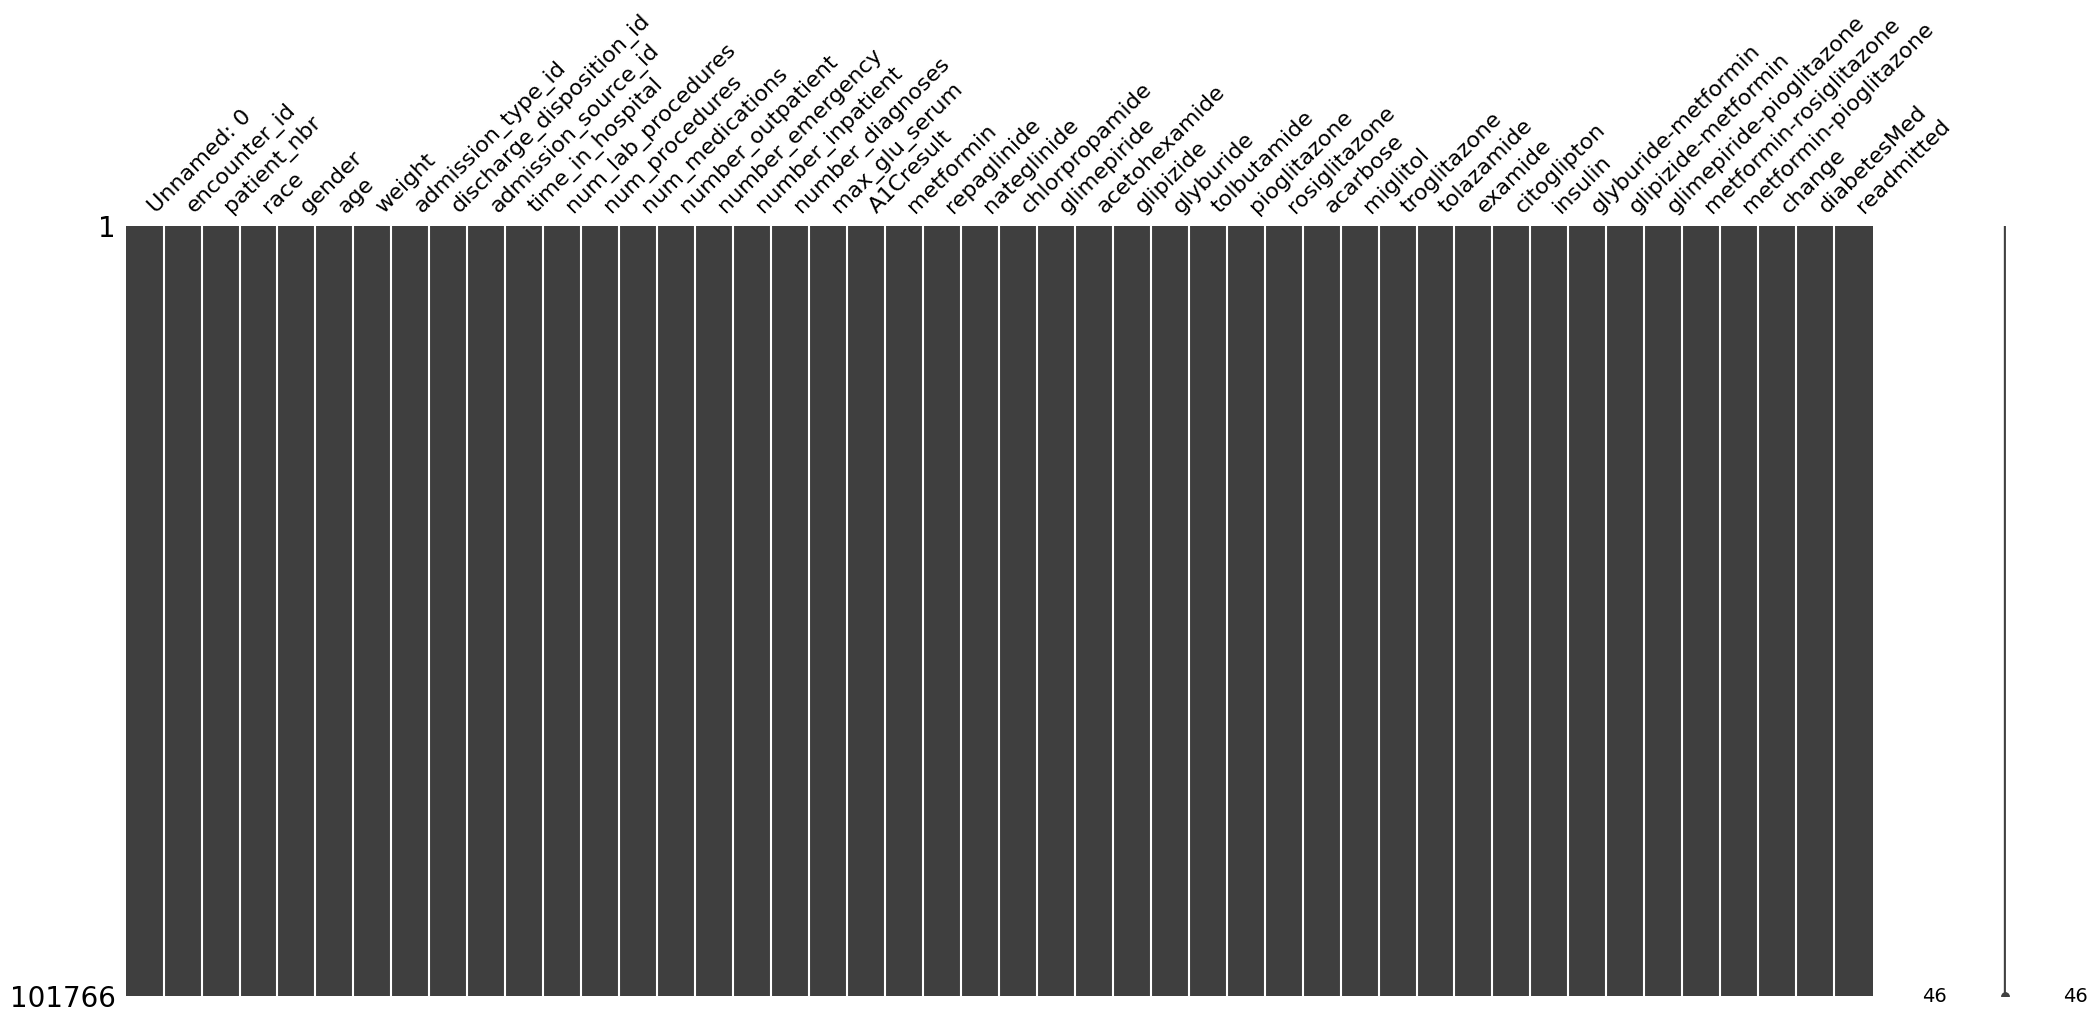

In [11]:
msno.matrix(dm)

In [12]:
dm.head()

Unnamed: 0  encounter_id  patient_nbr  race  gender  age  weight   
0           0       2278392      8222157     3       0    1     999  \
1           1        149190     55629189     3       0    2     999   
2           2         64410     86047875     1       0    3     999   
3           3        500364     82442376     3       1    4     999   
4           4         16680     42519267     3       1    5     999   

   admission_type_id  discharge_disposition_id  admission_source_id  ...   
0                  6                        25                    1  ...  \
1                  1                         1                    7  ...   
2                  1                         1                    7  ...   
3                  1                         1                    7  ...   
4                  1                         1                    7  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin   
0            0        0                    0                    0  \
1            0        1                    0                    0   
2            0        0                    0                    0   
3            0        1                    0                    0   
4            0        1                    0                    0   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone   
0                         0                        0                       0  \
1                         0                        0                       0   
2                         0                        0                       0   
3                         0                        0                       0   
4                         0                        0                       0   

   change  diabetesMed  readmitted  
0       0            0           0  
1       1            1           1  
2       0            1           0  
3       1            1           0  
4       1            1           0  

[5 rows x 46 columns]

In [13]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Unnamed: 0                101766 non-null  int64
 1   encounter_id              101766 non-null  int64
 2   patient_nbr               101766 non-null  int64
 3   race                      101766 non-null  int64
 4   gender                    101766 non-null  int64
 5   age                       101766 non-null  int64
 6   weight                    101766 non-null  int64
 7   admission_type_id         101766 non-null  int64
 8   discharge_disposition_id  101766 non-null  int64
 9   admission_source_id       101766 non-null  int64
 10  time_in_hospital          101766 non-null  int64
 11  num_lab_procedures        101766 non-null  int64
 12  num_procedures            101766 non-null  int64
 13  num_medications           101766 non-null  int64
 14  number_outpatient   

In [16]:
numerical = ['age','weight', 'diabetesMed']

In [17]:
dm[numerical].describe()

age         weight    diabetesMed
count  101766.000000  101766.000000  101766.000000
mean        7.096702     967.740336       0.770031
std         1.594084     173.574350       0.420815
min         1.000000       1.000000       0.000000
25%         6.000000     999.000000       1.000000
50%         7.000000     999.000000       1.000000
75%         8.000000     999.000000       1.000000
max        10.000000     999.000000       1.000000

### Skewness

In [18]:
dm[numerical].skew()

age           -0.630539
weight        -5.372626
diabetesMed   -1.283399
dtype: float64

### Univariate Analysis

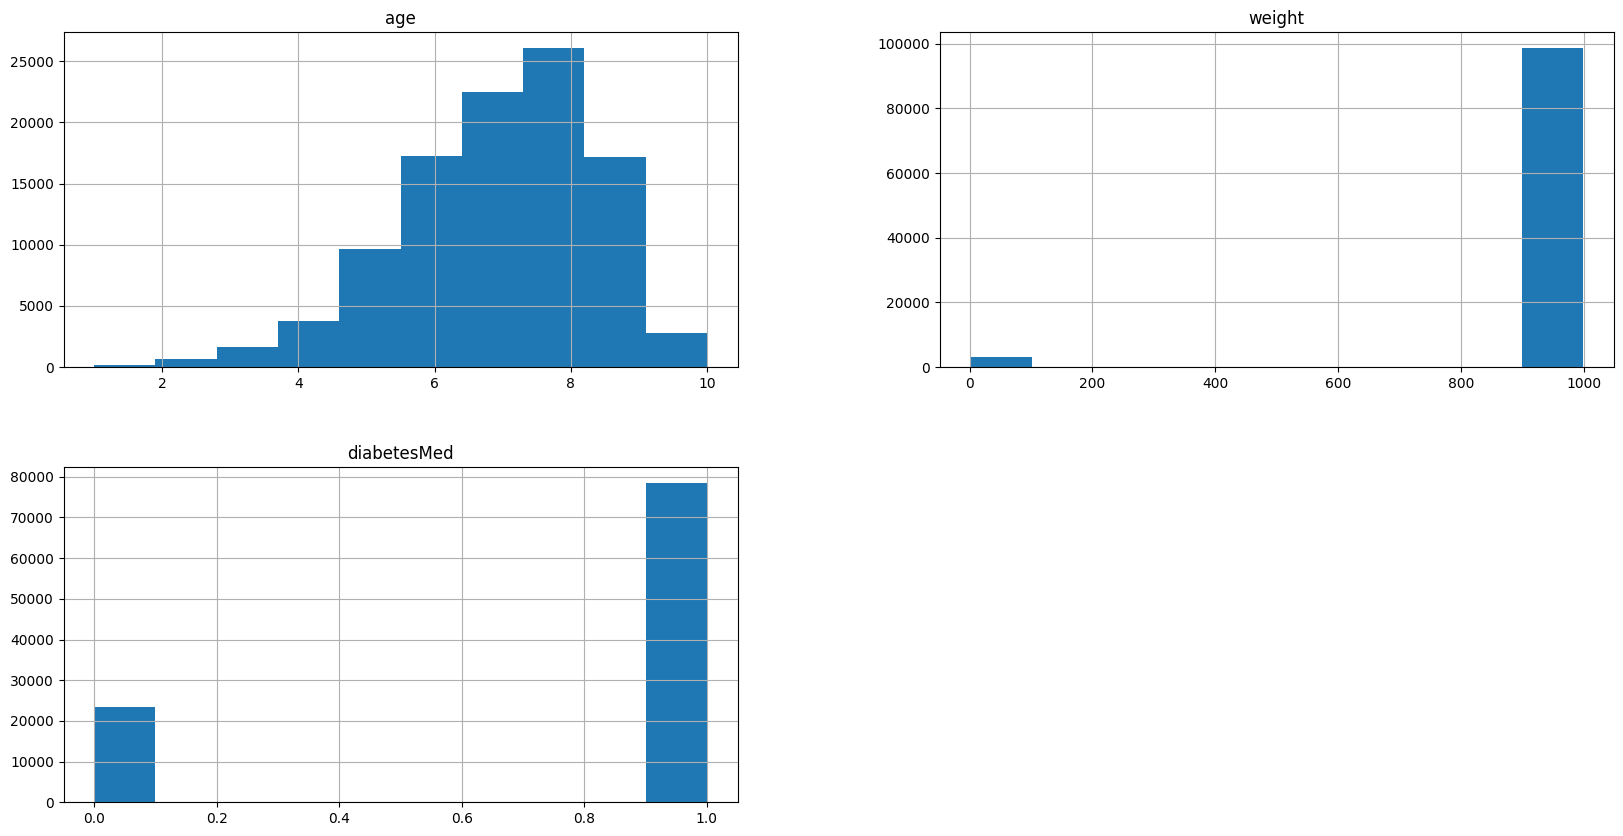

In [19]:
dm[numerical].hist(figsize=(20,10));

Age

In [20]:
print (f'{round(dm["age"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(dm, x="age", title='Age', width=500, height=500)
fig.show()

age
8     25.62
7     22.09
6     16.96
9     16.90
5      9.52
4      3.71
10     2.74
3      1.63
2      0.68
1      0.16
Name: proportion, dtype: float64


WEIGHT

In [21]:
print (f'{round(dm["weight"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(dm, x="weight", title='Weight', width=500, height=500)
fig.show()

weight
999    96.86
4       1.31
3       0.88
5       0.61
6       0.14
2       0.10
1       0.05
7       0.03
8       0.01
9       0.00
Name: proportion, dtype: float64


DIABETES MEDICATION

In [22]:
print (f'{round(dm["diabetesMed"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(dm, x="diabetesMed", title='DiabetesMed', width=500, height=500)
fig.show()

diabetesMed
1    77.0
0    23.0
Name: proportion, dtype: float64


In [24]:
dm[numerical].corr()

age    weight  diabetesMed
age          1.000000 -0.013098    -0.022601
weight      -0.013098  1.000000     0.034918
diabetesMed -0.022601  0.034918     1.000000

In [26]:
dm.groupby('readmitted')[numerical].mean()

age      weight  diabetesMed
readmitted                                   
0           7.073179  973.650519     0.755727
1           7.140526  956.729554     0.796680

And the correlation with the target variable

In [28]:
dm[['age','weight','diabetesMed','readmitted']].corr()

age    weight  diabetesMed  readmitted
age          1.000000 -0.013098    -0.022601    0.020142
weight      -0.013098  1.000000     0.034918   -0.046476
diabetesMed -0.022601  0.034918     1.000000    0.046396
readmitted   0.020142 -0.046476     0.046396    1.000000

<Axes: >

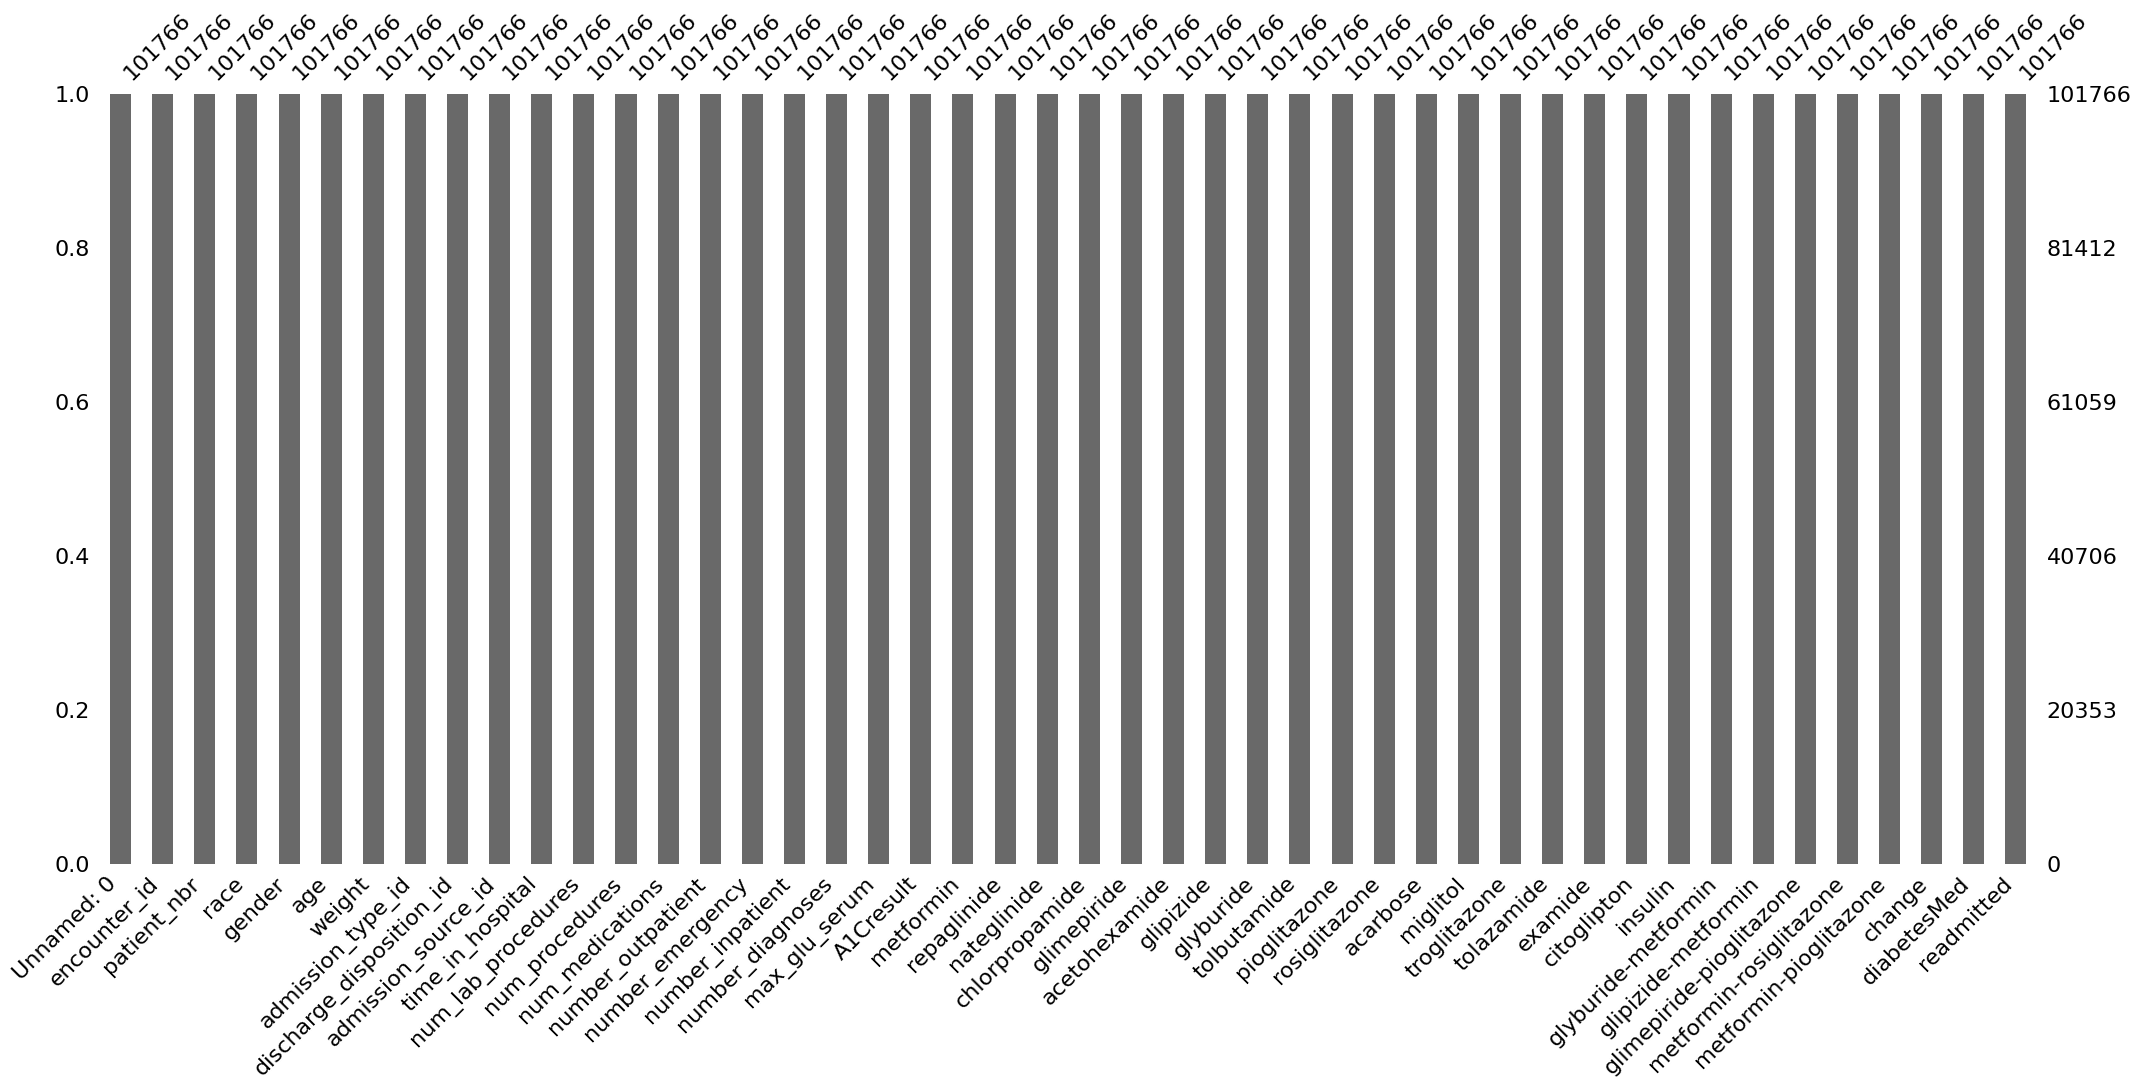

In [29]:
msno.bar(dm)